In [1]:
!unzip foodborne-diseases.zip

Archive:  foodborne-diseases.zip
replace outbreaks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [1]:
import pandas as pd

data = pd.read_csv("outbreaks.csv")
data.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [2]:
data.Species.value_counts()

data_clean_target = data.dropna(subset=['Species'])

In [47]:
len(data_clean_target)

12500

In [48]:
len(data)

19119

In [3]:
data_clean_target.isnull().sum()
data_clean_target.fillna('Unknown')

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
3,1998,January,California,Restaurant,"Fish, Ahi",Unknown,Scombroid toxin,Unknown,Confirmed,4,0,0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Unknown,Salmonella enterica,Enteritidis,Confirmed,26,3,0
5,1998,January,California,Restaurant,Unknown,Unknown,Shigella boydii,Unknown,Confirmed,25,3,0
7,1998,January,California,Restaurant,"Stuffing, Unspecified; Sandwich, Turkey",Unknown,Salmonella enterica,Enteritidis,Confirmed,4,3,0
8,1998,January,Colorado,Restaurant,"Salad, Unspecified",Unknown,Virus,Unknown,Suspected,21,Unknown,Unknown
9,1998,January,Colorado,Restaurant,"Peppers, Chili",Unknown,Virus,Unknown,Suspected,3,Unknown,0
10,1998,January,Colorado,Grocery Store,Unknown,Unknown,Virus,Unknown,Suspected,8,Unknown,Unknown
11,1998,January,Colorado,Restaurant,Unknown,Unknown,Virus,Unknown,Suspected,28,Unknown,0
12,1998,January,Colorado,Private Home/Residence,Unknown,Unknown,Virus,Unknown,Suspected,10,Unknown,Unknown
15,1998,January,Florida,Restaurant,"Ethnic Style, Unspecified",Unknown,Clostridium perfringens,Unknown,Suspected,3,0,0


In [4]:
data_clean_target.head()

food = data_clean_target['Food'].str.get_dummies(sep=',')
location = data_clean_target['Location'].str.get_dummies(sep=',')
status = data_clean_target['Status'].str.get_dummies()

state = data_clean_target['State'].str.get_dummies()

In [5]:
df = pd.concat([data_clean_target, food, location, status, state], axis=1)
df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,...,0,0,0,0,0,0,0,0,0,0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,...,0,0,0,0,0,0,0,0,0,0
5,1998,January,California,Restaurant,NaN,NaN,Shigella boydii,NaN,Confirmed,25,...,0,0,0,0,0,0,0,0,0,0
7,1998,January,California,Restaurant,"Stuffing, Unspecified; Sandwich, Turkey",NaN,Salmonella enterica,Enteritidis,Confirmed,4,...,0,0,0,0,0,0,0,0,0,0
8,1998,January,Colorado,Restaurant,"Salad, Unspecified",NaN,Virus,NaN,Suspected,21,...,0,0,0,0,0,0,0,0,0,0


In [6]:
len(df.columns)

2403

In [7]:
df_final = df.drop(['Ingredient','Year', 'Month', 'State', 'Location', 'Food', 'Serotype/Genotype', 'Status'], axis=1)

In [8]:
df_final.isnull().sum() != 0

Species                                               False
Illnesses                                             False
Hospitalizations                                       True
Fatalities                                             True
 1% Milk Pasteurized                                  False
 1% Milk Pasteurized; Leaf Lettuce; Cheddar Cheese    False
 1% Milk Unpasteurized; Sauces                        False
 2% Milk Pasteurized                                  False
 Ahi                                                  False
 Akule                                                False
 Ala King                                             False
 Albacore                                             False
 Almaco Jack                                          False
 Almonds                                              False
 Amberjack                                            False
 Amberjack; Fish                                      False
 And Cheese Biscuit                     

In [9]:
df_final['Fatalities'] = df_final.Fatalities.fillna(0)
df_final['Hospitalizations'] = df_final.Hospitalizations.fillna(0)
df_final['Illnesses'] = df_final.Illnesses.fillna(0)
df_final.fillna(0)

,Species,Illnesses,Hospitalizations,Fatalities,1% Milk Pasteurized,1% Milk Pasteurized; Leaf Lettuce; Cheddar Cheese,1% Milk Unpasteurized; Sauces,2% Milk Pasteurized,Ahi,Akule,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
3,Scombroid toxin,4,0.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Salmonella enterica,26,3.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Shigella boydii,25,3.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Salmonella enterica,4,3.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Virus,21,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Virus,3,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Virus,8,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Virus,28,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Virus,10,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,Clostridium perfringens,3,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_final.isnull().sum() != 0

Species                                               False
Illnesses                                             False
Hospitalizations                                      False
Fatalities                                            False
 1% Milk Pasteurized                                  False
 1% Milk Pasteurized; Leaf Lettuce; Cheddar Cheese    False
 1% Milk Unpasteurized; Sauces                        False
 2% Milk Pasteurized                                  False
 Ahi                                                  False
 Akule                                                False
 Ala King                                             False
 Albacore                                             False
 Almaco Jack                                          False
 Almonds                                              False
 Amberjack                                            False
 Amberjack; Fish                                      False
 And Cheese Biscuit                     

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y = df_final['Species']

x = df_final.drop(['Species'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)


In [17]:
x_test.head(1)

x_test.to_csv('test_data.csv')

In [13]:
df_final.to_csv('clean_data.csv')

In [25]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=20, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [26]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 4.62864134
Iteration 2, loss = 3.87353298
Iteration 3, loss = 3.61023155
Iteration 4, loss = 3.46561153
Iteration 5, loss = 3.35558949
Iteration 6, loss = 3.26163181
Iteration 7, loss = 3.16421900
Iteration 8, loss = 3.08497848
Iteration 9, loss = 3.01261740
Iteration 10, loss = 2.95743856
Iteration 11, loss = 2.91650852
Iteration 12, loss = 2.87242605
Iteration 13, loss = 2.83253772
Iteration 14, loss = 2.80406174
Iteration 15, loss = 2.77362003
Iteration 16, loss = 2.74731213
Iteration 17, loss = 2.72717207
Iteration 18, loss = 2.70930730
Iteration 19, loss = 2.68340045
Iteration 20, loss = 2.67004914


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [27]:
accuracy_score(y_test, y_pred)


0.3184

In [ ]:
for model in []

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

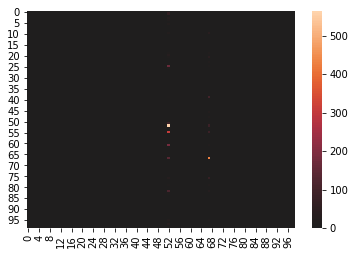

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, center=True)
plt.show()

In [37]:
y_pred

array(['Salmonella enterica', 'Norovirus genogroup I',
       'Salmonella enterica', ..., 'Norovirus genogroup I',
       'Norovirus genogroup I', 'Norovirus genogroup I'], dtype='<U271')

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.23744

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.20736

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

KeyboardInterrupt: 

In [ ]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)